In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import apachelog, sys

Set Format

In [3]:
fformat = r' %h %l %u %t \"%r\" %>s %b '

Create Parcer:

In [4]:
p = apachelog.parser(fformat)

Sample string:
    '199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'

In [5]:
sample_string = '199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245'

In [6]:
data = p.parse(sample_string)

In [7]:
data

{'%>s': '200',
 '%b': '6245',
 '%h': '199.72.81.55',
 '%l': '-',
 '%r': 'GET /history/apollo/ HTTP/1.0',
 '%t': '[01/Jul/1995:00:00:01 -0400]',
 '%u': '-'}

In [8]:
log = open('NASA_access_log_Jul95').readlines()

In [9]:
log_list = []
for line in log:
    try:
          data = p.parse(line)
    except:
          sys.stderr.write("Unable to parse %s" % line)
    data['%t'] = data['%t'][1:12]+' '+data['%t'][13:21]+' '+data['%t'][22:27]
      
    log_list.append(data)

Unable to parse frank.mtsu.edu - - [03/Jul/1995:02:41:15 -0400] "GET /images/" HTTP/1.0" 404 -
Unable to parse frank.mtsu.edu - - [03/Jul/1995:02:47:17 -0400] "GET /images/" HTTP/1.0" 404 -
Unable to parse frank.mtsu.edu - - [03/Jul/1995:02:48:51 -0400] "GET /images/" HTTP/1.0" 404 -
Unable to parse frank.mtsu.edu - - [03/Jul/1995:02:50:27 -0400] "GET /images" HTTP/1.0" 404 -
Unable to parse 141.102.80.253 - - [07/Jul/1995:11:57:49 -0400] "GET /history/apollo/apollo.html" HTTP/1.0" 404 -
Unable to parse 141.102.80.130 - - [12/Jul/1995:13:42:32 -0400] "GET /history/apollo/apollo.html" HTTP/1.0" 404 -
Unable to parse 141.102.80.130 - - [13/Jul/1995:19:25:35 -0400] "GET /history/apollo/apollo.html" HTTP/1.0" 404 -
Unable to parse ris1_u27.rsoc.rockwell.com - - [14/Jul/1995:10:37:53 -0400] "GET /history/apollo/apollo.html" HTTP/1.0" 404 -
Unable to parse piweba3y.prodigy.com - - [14/Jul/1995:23:46:07 -0400] "GET /history/appollo/appollo-13/html-"more%20info" HTTP/1.0" 404 -
Unable to parse

In [10]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel

In [11]:
df = DataFrame(log_list)

In [12]:
df[0:2]

,%>s,%b,%h,%l,%r,%t,%u
0,200,6245,199.72.81.55,-,GET /history/apollo/ HTTP/1.0,01/Jul/1995 00:00:01 -0400,-
1,200,3985,unicomp6.unicomp.net,-,GET /shuttle/countdown/ HTTP/1.0,01/Jul/1995 00:00:06 -0400,-


In [13]:
del df['%l']; del df['%u']

In [14]:
df = df.rename(columns={'%>s': 'Status', '%b':'b', 
                        '%h':'IP', '%r':'Request', '%t': 'Time'})

In [15]:
df.head()

,Status,b,IP,Request,Time
0,200,6245,199.72.81.55,GET /history/apollo/ HTTP/1.0,01/Jul/1995 00:00:01 -0400
1,200,3985,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,01/Jul/1995 00:00:06 -0400
2,200,4085,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,01/Jul/1995 00:00:09 -0400
3,304,0,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,01/Jul/1995 00:00:11 -0400
4,200,4179,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,01/Jul/1995 00:00:11 -0400


In [16]:
times = df['Time']

Convert Time column to datetime format and make an index out of it (pop will drop original Time column):

In [17]:
df.index = pd.to_datetime(df.pop('Time'))

The Status variable is a string type, so we have to change it to int:

In [18]:
df['Status'] = df['Status'].astype('int')

In [19]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576.
    
    return x

In [20]:
df['b'] = df['b'].apply(dash2nan)

Traffic analysis

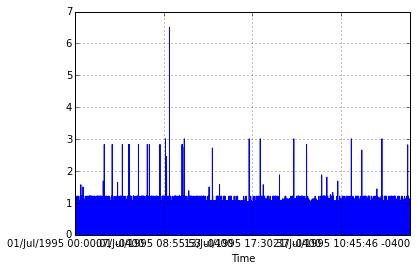

In [23]:
df['b'].plot()

In [24]:
ips = df.groupby('IP').size()

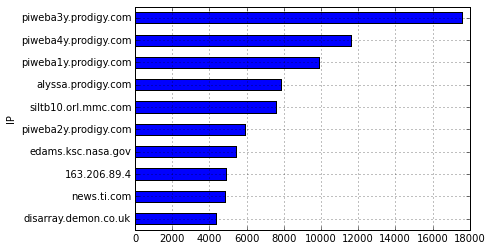

In [25]:
ips.sort()
ips[-10:].plot(kind='barh')

In [26]:
ips_fd = DataFrame({'Number of requests':ips[-10:]})
ips_fd = ips_fd.sort(columns='Number of requests',  ascending=False)
ips_fd

,Number of requests
IP,
piweba3y.prodigy.com,17571
piweba4y.prodigy.com,11591
piweba1y.prodigy.com,9868
alyssa.prodigy.com,7852
siltb10.orl.mmc.com,7573
piweba2y.prodigy.com,5922
edams.ksc.nasa.gov,5434
163.206.89.4,4906
news.ti.com,4863


In [27]:
ips_status = df.groupby(['IP', 'Status']).size()

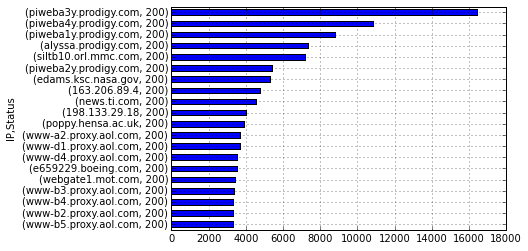

In [28]:
ips_status.sort()
ips_status[-20:].plot(kind='barh')

#Request analysis

In [29]:
Rqs = df.groupby('Request').size()

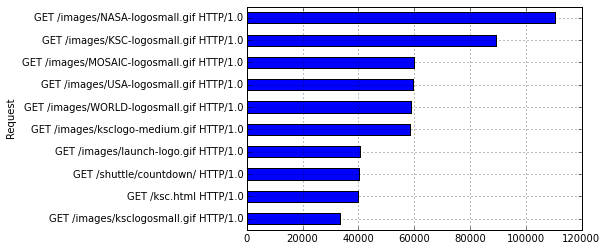

In [30]:
Rqs.sort()
Rqs[-10:].plot(kind='barh')

In [31]:
Rqs_fd = DataFrame({'Number of requests':Rqs[-100:]})
Rqs_fd = Rqs_fd.sort(columns='Number of requests',  ascending=False)
Rqs_fd

,Number of requests
Request,
GET /images/NASA-logosmall.gif HTTP/1.0,110679
GET /images/KSC-logosmall.gif HTTP/1.0,89356
GET /images/MOSAIC-logosmall.gif HTTP/1.0,59967
GET /images/USA-logosmall.gif HTTP/1.0,59515
GET /images/WORLD-logosmall.gif HTTP/1.0,58997
GET /images/ksclogo-medium.gif HTTP/1.0,58411
GET /images/launch-logo.gif HTTP/1.0,40780
GET /shuttle/countdown/ HTTP/1.0,40132
GET /ksc.html HTTP/1.0,39830


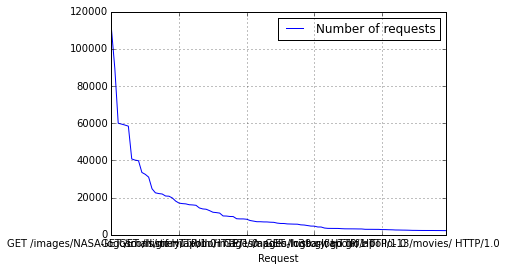

In [32]:
Rqs_fd.plot()